In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Сотрудники отдел маркетинга компании Мегафон знают, как важно быть максимально внимательными к нуждам клиентов, но не навязчивыми. Поэтому они разработали промоакцию для тех, кто не очень удовлетворен качеством услуг и подумывает о смене провайдера связи. Это специальный тарифный план с очень большой скидкой для удержания таких клиентов.

Но для того, чтобы окончательно оценить бюджет этой кампании на следующий месяц, маркетологам нужна помощь датасайентистов. Важно определить именно тех клиентов, которые на грани ухода и удержать их. Отток (сhurn - loss of customers) это большая проблема для телеком компаний, потому что привлечение нового клиента стоит намного дороже удержания существующего.

Вам, как датасайентистам, необходимо предсказать: уйдет ли этот клиент в течение следующего месяца или нет.

## Задача и данные

**Прогнозирование оттока клиентов телекоммуникационной компании**

На основе данных о клиентах телекоммуникационной компании предсказать: уйдет ли этот клиент в течение следующего месяца.

**Целевая переменная**. 
Churn (1 - клиент расторгнет договор в течение следующего месяца, 0 - останется клиентом).

**Метрика** [F2](https://dyakonov.org/2019/05/31/%d1%84%d1%83%d0%bd%d0%ba%d1%86%d0%b8%d0%be%d0%bd%d0%b0%d0%bb%d1%8b-%d0%ba%d0%b0%d1%87%d0%b5%d1%81%d1%82%d0%b2%d0%b0-%d0%b2-%d0%b7%d0%b0%d0%b4%d0%b0%d1%87%d0%b5-%d0%b1%d0%b8%d0%bd%d0%b0%d1%80%d0%bd/#more-6567) 

**Данные**

train.csv - набор данных для обучения   
test.csv - набор данных для предсказания  
sample_submission.csv - пример сабмита для отправки в проверяющую систему 

## Описание полей

В датасете собраны данные о пользователях телекоммуникационной компании:

*   State - штат
*   Account length - как долго этот клиент с компанией (количество дней)
*   Area code - код географической зоны
*   International plan - подключен ли спец тариф для международных звонков
*   Voice mail plan - подключен сервис голосовых сообщений
*   Number vmail messages - количество голосовых сообщений
*   Total day minutes - продолжительность разговоров в дневное время (минуты) 
*   Total day calls - количество звонков в дневное время
*   Total day charge - расходы на звонки в дневное время
*   Total eve minutes - продолжительность разговоров в вечернее время
*   Total eve calls - количество звонков в вечернее время
*   Total eve charge - расходы на звонки в вечернее время
*   Total night minutes - продолжительность разговоров в ночное время
*   Total night calls - количество звонков в дневное время
*   Total night charge - расходы на звонки в вечернее время
*   Total intl minutes - продолжительность международных звонков
*   Total intl calls - количество международных звонков
*   Total intl charge - расходы на межденародные звонки 
*   Customer service calls - количество обращений в службу поддержки
*   Churn - текущий статус клиента (ушел/остался)

## 1. Посмотрим на данные

In [ ]:
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.head()

FileNotFoundError: ignored

In [ ]:
# Проверим, что нет пропусков
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

(None, None)

In [ ]:
# Посмотрим на баланс классов
train['Churn'].value_counts()

False    2278
True      388
Name: Churn, dtype: int64

### Задание 1. 

Вычислите, какую долю клиентов уже потеряла компания.
Ответ округлите до четырех знаков после запятой, в качестве разделителя используйте "."

In [ ]:
# Ваш код здесь

### Задание 2.

Поле State содержит названия штатов, подсчитайте количество уникальных значений этого признака.

Ответ принимается в виде целого числа

In [ ]:
import pandas as pd

def get_busiest_states(data):
  clear_data = data[['State', 'Total intl calls']].groupby('State').sum().sort_values(by=['Total intl calls','State'], ascending=[False, True])
  data_series = clear_data.squeeze()
  return data_series

df = pd.read_csv('data.csv')
busiest_states = get_busiest_states(df)
print(busiest_states)

State
WV    385
WY    325
NY    324
VA    313
AL    310
MN    310
OH    293
UT    277
OR    273
VT    270
MI    267
MD    263
TX    259
NV    257
WI    251
CO    250
MO    249
OK    248
ID    241
NJ    240
AZ    238
CT    235
MS    235
MT    234
IN    230
AR    227
ME    227
KS    226
ND    226
MA    223
NC    219
WA    217
NH    215
RI    215
FL    213
NM    211
SD    211
AK    210
HI    210
SC    201
DE    199
GA    198
IL    195
NE    185
DC    182
IA    181
KY    181
TN    174
LA    152
PA    129
CA    106
Name: Total intl calls, dtype: int64


In [ ]:
# Ваш код здесь

### Займемся анализом данных

Чтобы понять, какой клиент перед нами: лояльный или нет, нужно научиться их различать.
Пользуясь имеющимися данными попробуем определить какие есть закономерности в поведении клиентов этих двух категорий.

In [ ]:
# Сравним средние значения признаков
train[train['Churn'] == 1].mean()

Account length            102.319588
Area code                 437.543814
Number vmail messages       5.170103
Total day minutes         205.181186
Total day calls           101.195876
Total day charge           34.881340
Total eve minutes         209.385309
Total eve calls            99.948454
Total eve charge           17.797861
Total night minutes       205.307216
Total night calls         100.682990
Total night charge          9.238892
Total intl minutes         10.819330
Total intl calls            4.051546
Total intl charge           2.921727
Customer service calls      2.206186
Churn                       1.000000
dtype: float64

In [ ]:
train[train['Churn'] == 0].mean()

Account length            100.330992
Area code                 437.420983
Number vmail messages       8.507463
Total day minutes         175.104346
Total day calls           100.159350
Total day charge           29.768266
Total eve minutes         198.853380
Total eve calls           100.036435
Total eve charge           16.902809
Total night minutes       200.464091
Total night calls         100.007902
Total night charge          9.020975
Total intl minutes         10.137840
Total intl calls            4.538191
Total intl charge           2.737709
Customer service calls      1.453029
Churn                       0.000000
dtype: float64

Кажется, довольно сложно увидеть отличия вглядываясь в числа. Будем рисовать.

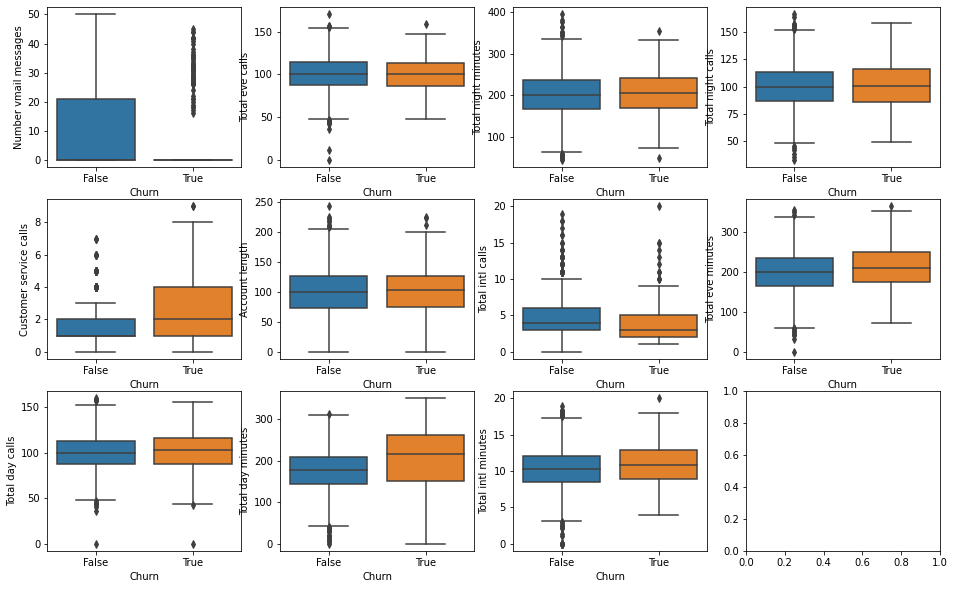

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Посмотрим на распределение значений вещественных признаков

num_f = list(set(train.columns) - set(['State', 'International plan', 
                                       'Voice mail plan',  'Area code',
                                      'Total day charge',   'Total eve charge', 
                                       'Total night charge', 'Total intl charge',
                                       'Churn']))

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 10))

for idx, feat in  enumerate(num_f):
    sns.boxplot(x = 'Churn', y = feat, data = train, ax = axes[idx // 4, idx % 4])
    axes[idx // 4, idx % 4].set_xlabel('Churn')
    axes[idx // 4, idx % 4].set_ylabel(feat);

На этих графиках намного проще увидеть отличия по целевой переменной. Есть большая вероятность, что именно эти признаки будут самыми важными при обучении модели:

*   Total day minutes
*   Customer service calls
*   Number vmail messages





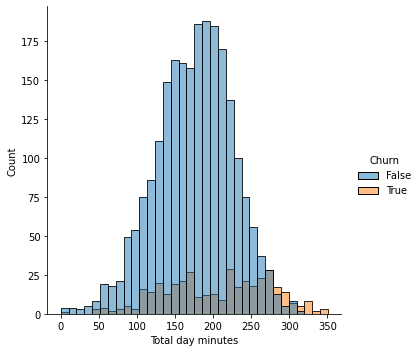

In [ ]:
sns.displot(train, x= 'Total day minutes', hue='Churn');

При более детальном рассмотрении видно, что пользователи, которые ушли от провайдера совершали больше говорили в день. Вероятно, их мог бы удержать специальный тариф с прогрессивной шкалой скидок в зависимости он суммарной длительности звонков в день.

## Подготовка данных для обучения

In [ ]:
# Подготовим признаки - например, можно убрать признак State
train = train.drop(['State'], axis = 1)

# А также заменить Yes/No на 0/1 в признаках International plan и Voice mail plan

train['International plan'] = train['International plan'].replace({"Yes":1,"No":0}).astype('int64')
train['Voice mail plan'] = train['Voice mail plan'].replace({"Yes":1,"No":0}).astype('int64')

In [ ]:
# Теперь точно так же обработаем test датасет
test = test.drop(['State'], axis = 1)

# А также заменить Yes/No на 0/1 в признаках International plan и Voice mail plan

test['International plan'] = test['International plan'].replace({"Yes":1,"No":0}).astype('int64')
test['Voice mail plan'] = test['Voice mail plan'].replace({"Yes":1,"No":0}).astype('int64')


In [ ]:
from sklearn.model_selection import train_test_split

# Разделим train датасет на данные для обучениz и валидации
X_train, X_test, y_train, y_test = train_test_split(train.drop(['Churn'],axis=1),
                                                    train['Churn'], test_size=0.2, 
                                                    random_state=42)

## Обучение модели

### [RandomForestClassifier](https://dyakonov.org/2016/11/14/%D1%81%D0%BB%D1%83%D1%87%D0%B0%D0%B9%D0%BD%D1%8B%D0%B9-%D0%BB%D0%B5%D1%81-random-forest/)

In [ ]:
# Для начала обучим алгоритм на самом простом, но надежном классификаторе
from sklearn.ensemble import RandomForestClassifier

# Инициализируем модель состоящую из 1000 решающих деревьев
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)

# Обучим эту модель
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
# Посчитаем качество модели (максимум 1)
from sklearn.metrics import fbeta_score

y_pred = rf.predict(X_test)
fbeta_score(y_test, y_pred, beta = 2)

0.7162162162162162

Как и ожидалось, качество не самое высокое. Его можно улучшить, изменяя параметры классификатора. Например, глубину деревьев или максимальное количество признаков.

### [Decision tree](https://habr.com/ru/company/ods/blog/322534/)

In [ ]:
# Для начала обучим алгоритм на самом простом, но надежном классификаторе
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion="entropy", max_features = 5)

# Обучим эту модель
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred = dt.predict(X_test)
fbeta_score(y_test, y_pred, beta = 2)

0.6426735218508998

Качество этой модели хуже, чем предыдущей. Это логично, т.к. случайный лес - это ансамбль из большого количества решающих деревьев, а ансамбль работает всегда лучше.  

Настало время попробовать самый успешный из простых классификатор!

XGBoost

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=5300, learning_rate=0.022, max_depth=6)

# Обучим эту модель
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.022, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=5300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred = xgb.predict(X_test)
fbeta_score(y_test, y_pred, beta = 2)

0.7712765957446809

Как видите, он действительно дает самое хорошее качество из трех классификаторов.  

Чтобы модель предсказывала еще лучше вы можете применить все свои креативные идеи: менять параметры или наборы признаков для обучения.

### Подготовка сабмита

Обновление, видимо надо было указать ID попытки
ID	5757348

In [ ]:
# попытка 5757348
# Берем заготовку для сабмита
submit = pd.read_csv('sample_submission.csv')

In [ ]:
# Заполняем колонку Churn предсказаниями лучшего алгоритма
submit['Churn'] = xgb.predict(test)

In [ ]:
# Записываем в файл, а затем его отправляем в проверяющую систему
submit.to_csv('submit_xgb.csv')

Объяснение решения:
подбор оптимальных параметров (n_estimators=5300, learning_rate=0.022, max_depth=6) проводился с помощью рандомайзера. Использовался следующйи код:
```
# Выбран кодовый формат
best_fb = 0.8026315789473685
from xgboost import XGBClassifier
for s_count in range(1, 50):
      lr = random.randint(1,30)/1000
      est = random.randint(50, 65)*100
      m_dep = random.randint(5, 13)
      xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                    colsample_bynode=1, colsample_bytree=1, gamma=0,
                    learning_rate=lr, max_delta_step=0, max_depth=m_dep,
                    min_child_weight=1, missing=None, n_estimators=est, n_jobs=1,
                    nthread=None, objective='binary:logistic', random_state=0,
                    reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
                    silent=None, subsample=1, verbosity=1)
      xgb.fit(X_train, y_train)
      y_pred = xgb.predict(X_test)
      fb = fbeta_score(y_test, y_pred, beta = 2)
      print(lr, est, m_dep, fb)
      if fbeta_score(y_test, y_pred, beta = 2) >= best_fb:
        lr_best = lr
        est_best = est
        m_dep_best = m_dep
        best_fb = fb
        print("the best results", lr_best, est_best, m_dep_best, best_fb)
print("the best results", lr_best, est_best, m_dep_best, best_fb)


```



Изначальные значения lr, est, m_dep были шире.
Всего было выполнено 4 последовательных подхода по уменьшению границ этих переменных.
Так же было рассмотрено несколько вариантов входных данных для X_train:
1. Полный набор
2. Вариант из лекции
3. Вариант с данными по минутам и стоимости (day, eve, intl) + Customer service calls	
4. Вариант только с Customer service calls
В ходе экспериментов определено что варианты 1 и 2 дают результат > 0.8, а варианты 3 и 4 значение 0.75 - 0.79. В дальнейшем использовался вариант 2.
Всего было выполнено около 500 запусков (настройка, проверка, исправление ошибок, а так же работа в цикле при поиске значений).
Будем считать что итоговый вариант это запуск №501.